In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import linear_model

In [15]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [16]:
pd.set_option('display.max_columns', None)
rawds= pd.read_csv("download-data-for-Aug-2017-Euro-6.csv", encoding='latin1')

In [17]:
rawds.head(5)

,Manufacturer,Description,Transmission,Engine Capacity,Fuel Type,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
0,ALFA ROMEO,1.3 JTDm-2 95 bhp,M5,1248.0,Diesel,4.3,2.9,3.4,65.7,97.4,83.1,89,807.0,67.5,234.0,67.0
1,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
2,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
3,CITROEN,BlueHDi 100 S&S,M5,1560.0,Diesel,3.7,3.1,3.3,76.3,91.1,85.6,86,784.0,68.8,272.0,55.0
4,CITROEN,BlueHDi 100 S&S ETG6,AMT6,1560.0,Diesel,3.9,3.2,3.4,72.4,88.3,83.1,89,807.0,69.2,185.0,40.0


In [18]:
rawds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 16 columns):
Manufacturer             5118 non-null object
Description              5118 non-null object
Transmission             5086 non-null object
Engine Capacity          5088 non-null float64
Fuel Type                5118 non-null object
Metric Urban Cold        5037 non-null float64
Metric Extra-Urban       5037 non-null float64
Metric Combined          5088 non-null float64
Imperial Urban Cold      5037 non-null float64
Imperial Extra-Urban     5037 non-null float64
Imperial Combined        5088 non-null float64
CO2 g/km                 5118 non-null int64
Fuel_Cost_12000_Miles    5088 non-null float64
Noise Level dBA          5118 non-null float64
Emissions CO mg/km       5088 non-null float64
Emissions Nox mg/km      5088 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 639.8+ KB


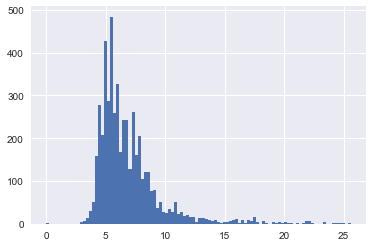

In [19]:
rawds['Metric Urban Cold'].hist(bins=100)

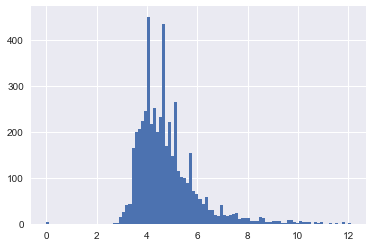

In [20]:
rawds['Metric Extra-Urban'].hist(bins=100)


In [21]:
sum(rawds['Manufacturer'].isnull())
sum(rawds['Description'].isnull())

0

In [22]:
sum(rawds['Transmission'].isnull())
sum(rawds['Engine Capacity'].isnull())
sum(rawds['Fuel Type'].isnull())


0

In [23]:
sum(rawds['Metric Extra-Urban'].isnull())

81

In [24]:
rawds.isnull().sum()

Manufacturer              0
Description               0
Transmission             32
Engine Capacity          30
Fuel Type                 0
Metric Urban Cold        81
Metric Extra-Urban       81
Metric Combined          30
Imperial Urban Cold      81
Imperial Extra-Urban     81
Imperial Combined        30
CO2 g/km                  0
Fuel_Cost_12000_Miles    30
Noise Level dBA           0
Emissions CO mg/km       30
Emissions Nox mg/km      30
dtype: int64

In [25]:
rawds.describe()

,Engine Capacity,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
count,5088.000000,5037.000000,5037.000000,5088.000000,5037.000000,5037.000000,5088.000000,5118.000000,5088.000000,5118.000000,5088.000000,5088.000000
mean,1986.814465,6.905182,4.805579,5.544929,45.362220,61.687314,55.250688,134.633841,1298.791470,71.100547,261.012579,37.200865
std,806.608051,2.760090,1.214175,1.776506,12.862403,12.615114,17.442871,40.377900,406.837373,2.047774,141.120813,21.062978
min,647.000000,0.000000,0.000000,0.600000,0.000000,0.000000,16.600000,0.000000,139.000000,63.000000,10.000000,1.000000
25%,1499.000000,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,1045.000000,70.000000,159.000000,22.000000
50%,1968.000000,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,1206.000000,71.000000,226.500000,35.000000
75%,1998.000000,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,148.000000,1430.000000,73.000000,336.250000,51.000000
max,6752.000000,25.600000,12.100000,17.000000,97.400000,104.600000,470.800000,395.000000,3944.000000,76.000000,935.000000,726.000000


# The Dataset Summary Statistics


In [26]:
rawds[['Metric Urban Cold', 'Transmission','Engine Capacity' ,'Metric Urban Cold', 'Metric Extra-Urban', 'Metric Combined', 'Imperial Urban Cold', 'Imperial Extra-Urban', 'Imperial Combined', 'CO2 g/km' ,'Fuel_Cost_12000_Miles', 'Noise Level dBA', 'Emissions CO mg/km' ,'Emissions Nox mg/km']].fillna(0)

,Metric Urban Cold,Transmission,Engine Capacity,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
0,4.3,M5,1248.0,4.3,2.9,3.4,65.7,97.4,83.1,89,807.0,67.5,234.0,67.0
1,3.9,M6,1496.0,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
2,3.9,M6,1496.0,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
3,3.7,M5,1560.0,3.7,3.1,3.3,76.3,91.1,85.6,86,784.0,68.8,272.0,55.0
4,3.9,AMT6,1560.0,3.9,3.2,3.4,72.4,88.3,83.1,89,807.0,69.2,185.0,40.0
5,3.7,M5,1461.0,3.7,3.5,3.5,76.4,83.1,80.7,90,831.0,73.8,271.0,31.0
6,3.7,M5,1461.0,3.7,3.4,3.5,76.4,83.1,80.7,90,831.0,71.5,155.0,30.0
7,3.8,M5,1560.0,3.8,3.2,3.4,74.3,88.3,83.1,87,807.0,69.4,196.0,34.0
8,4.1,M5,1248.0,4.1,3.0,3.4,68.9,94.2,83.1,89,807.0,71.5,177.0,40.0
9,4.0,M6,1598.0,4.0,3.0,3.4,70.6,94.2,83.1,89,807.0,69.0,202.0,59.0


In [27]:
rawds.replace(to_replace= 'NaN', value='1', inplace=False, limit=None, regex=False, method='pad', axis=None)

,Manufacturer,Description,Transmission,Engine Capacity,Fuel Type,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
0,ALFA ROMEO,1.3 JTDm-2 95 bhp,M5,1248.0,Diesel,4.3,2.9,3.4,65.7,97.4,83.1,89,807.0,67.5,234.0,67.0
1,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
2,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
3,CITROEN,BlueHDi 100 S&S,M5,1560.0,Diesel,3.7,3.1,3.3,76.3,91.1,85.6,86,784.0,68.8,272.0,55.0
4,CITROEN,BlueHDi 100 S&S ETG6,AMT6,1560.0,Diesel,3.9,3.2,3.4,72.4,88.3,83.1,89,807.0,69.2,185.0,40.0
5,DACIA,dCi 90,M5,1461.0,Diesel,3.7,3.5,3.5,76.4,83.1,80.7,90,831.0,73.8,271.0,31.0
6,DACIA,dCi 90,M5,1461.0,Diesel,3.7,3.4,3.5,76.4,83.1,80.7,90,831.0,71.5,155.0,30.0
7,DS,BlueHDi 100 S&S,M5,1560.0,Diesel,3.8,3.2,3.4,74.3,88.3,83.1,87,807.0,69.4,196.0,34.0
8,FIAT,1.3 MultiJet 95 bhp,M5,1248.0,Diesel,4.1,3.0,3.4,68.9,94.2,83.1,89,807.0,71.5,177.0,40.0
9,FIAT,1.6 MultiJet 120 bhp Elite (Eco),M6,1598.0,Diesel,4.0,3.0,3.4,70.6,94.2,83.1,89,807.0,69.0,202.0,59.0


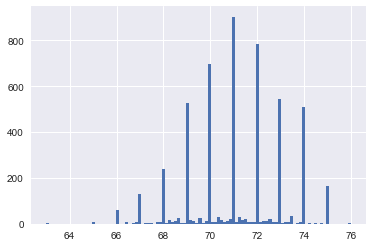

In [28]:
rawds['Noise Level dBA'].hist(bins=100)

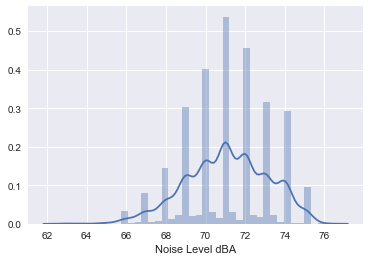

In [29]:
sns.distplot(rawds['Noise Level dBA'])

# The following bar-plot shows how different fuel typed vehicles fare on noise level emitted. 
# Although diesel-electric vehicles cost less on fuel, it's seen here in plot below that it's the one which emits the most noise.

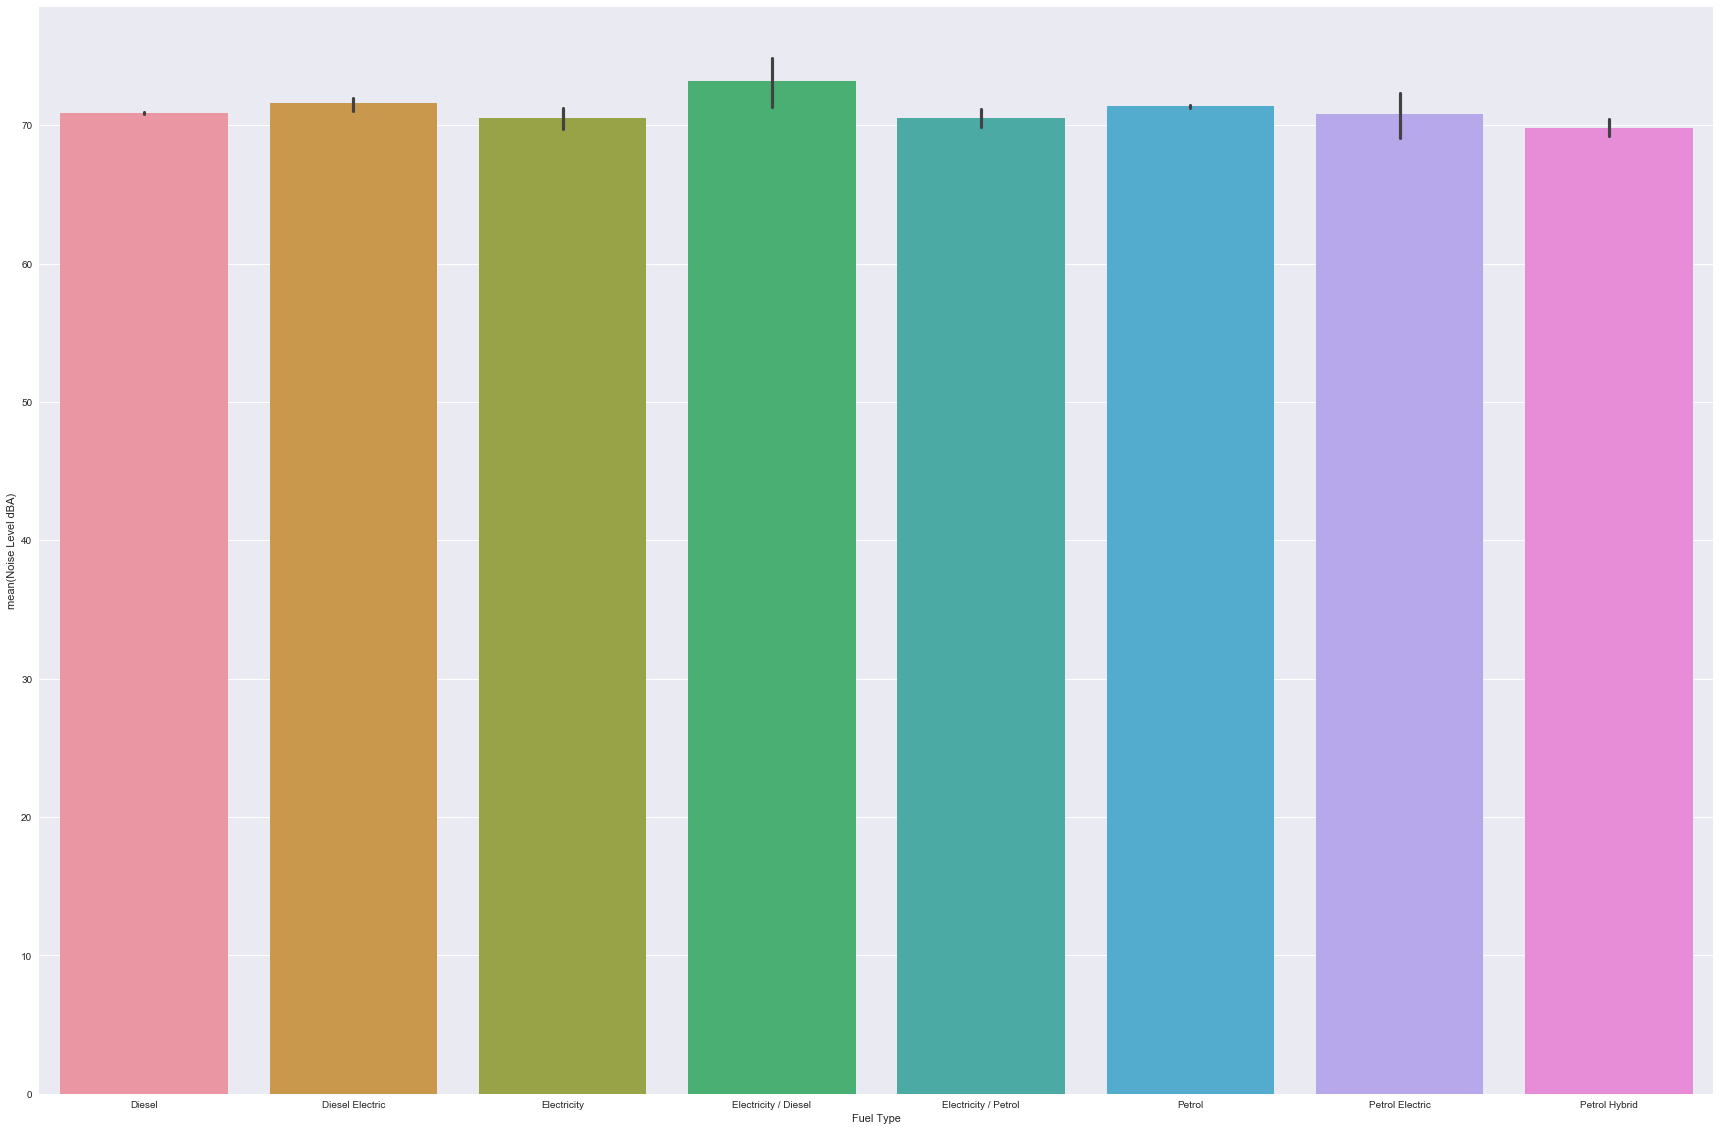

In [30]:
plt.rcParams['figure.figsize']=(30,20)
sns.barplot(x='Fuel Type', y='Noise Level dBA', data=rawds)

# Based on the above plot, let's try to see how the the parameters Noise Level and Fuel Cost fare on different plots.  
# Although there is  a bar plot to indicate, it doesnt make too much sense.  The pairplot further ahead, shows the minute region where both of them intersect and this is a region of interest.

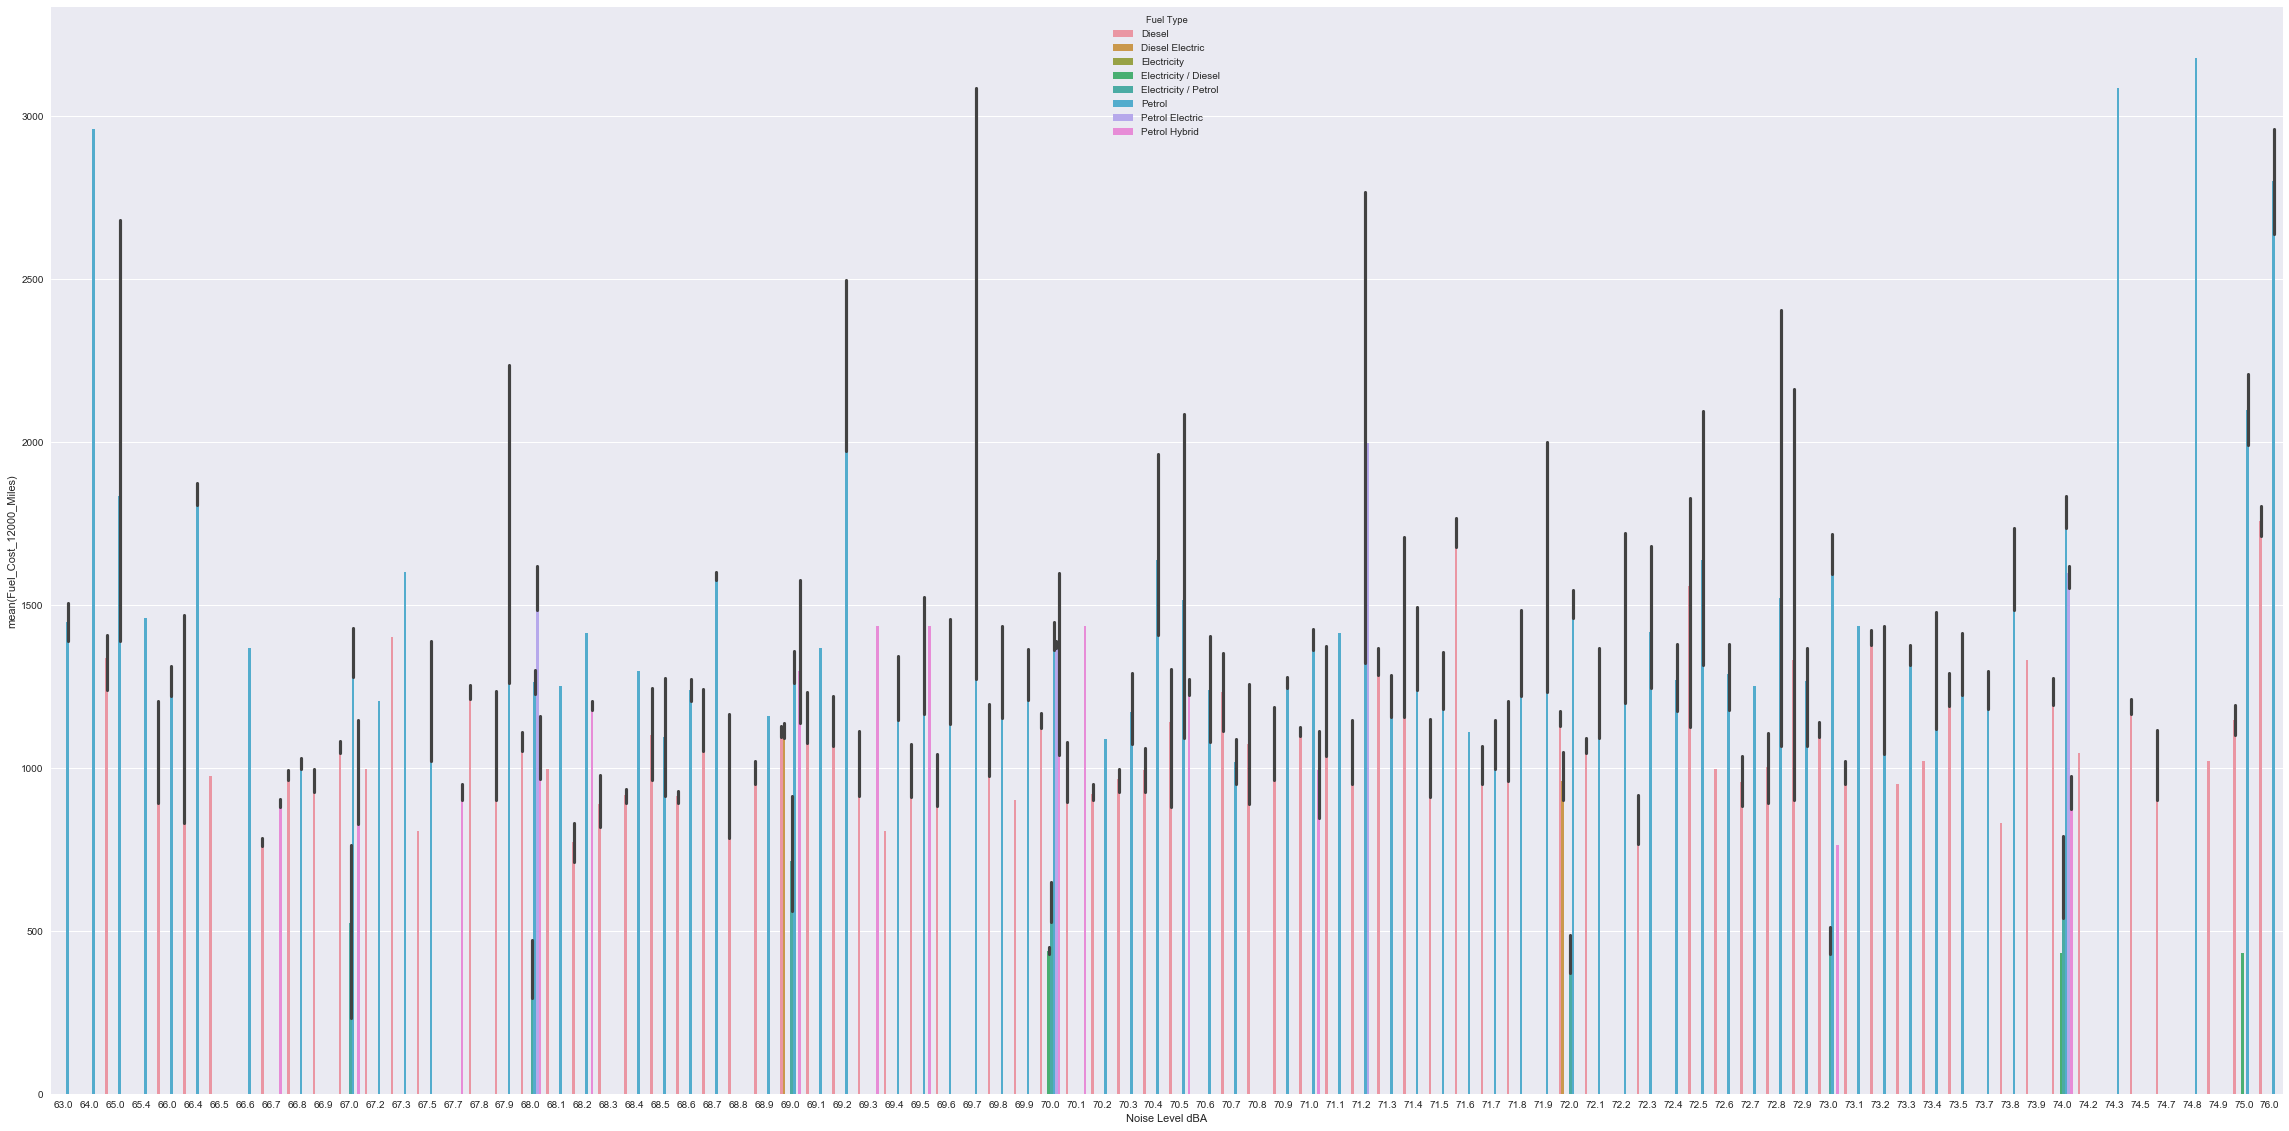

In [31]:
plt.rcParams['figure.figsize']=(40,20)
sns.barplot(x="Noise Level dBA", y="Fuel_Cost_12000_Miles", hue="Fuel Type", data=rawds)

                       Noise Level dBA  Fuel_Cost_12000_Miles
Noise Level dBA                1.00000                0.28128
Fuel_Cost_12000_Miles          0.28128                1.00000


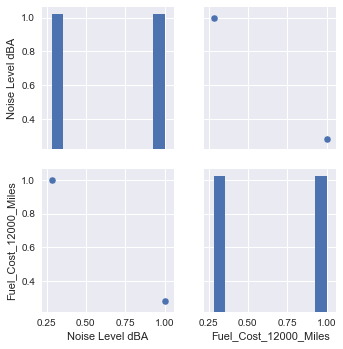

In [32]:
correlations = rawds[['Fuel Type', 'Noise Level dBA', 'Fuel_Cost_12000_Miles',]].corr()
print (correlations)
sns.pairplot(correlations)

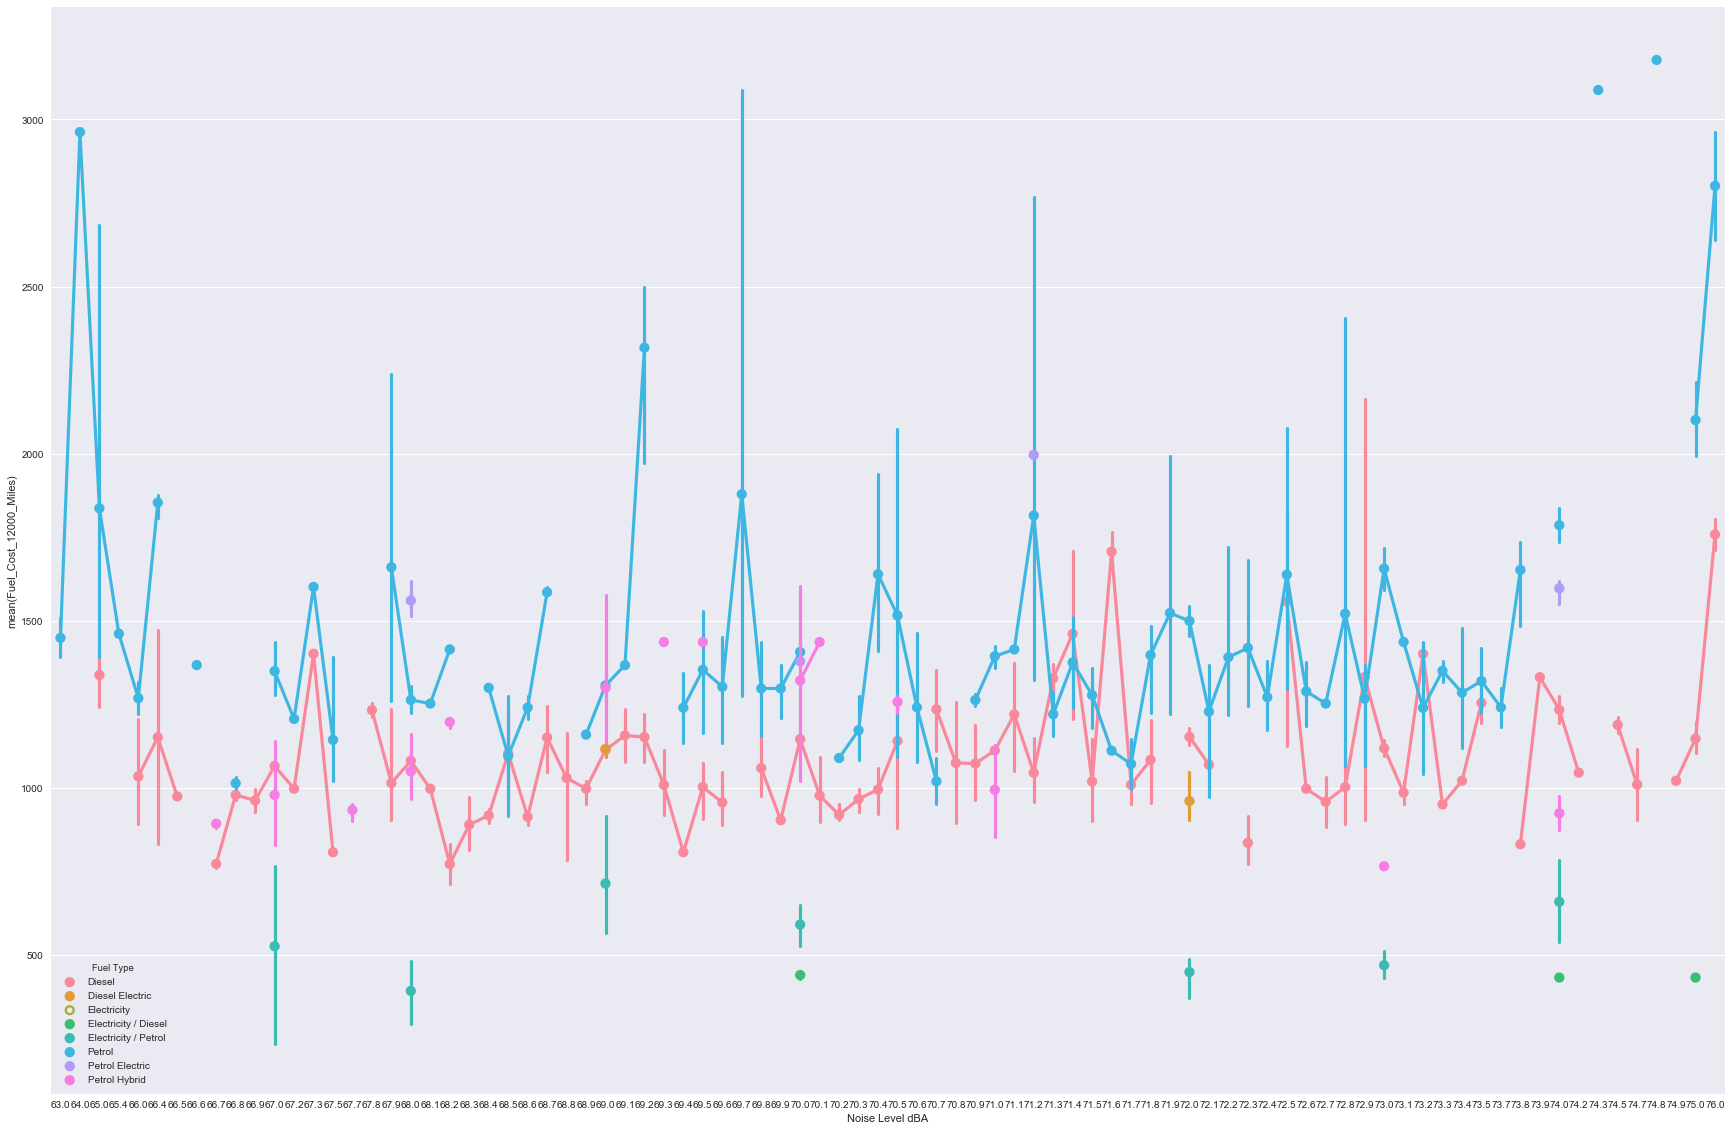

In [33]:
plt.rcParams['figure.figsize']=(30,20)
sns.pointplot(x="Noise Level dBA", y="Fuel_Cost_12000_Miles", hue="Fuel Type", data=rawds)

# **Just trying to compare different parameters**


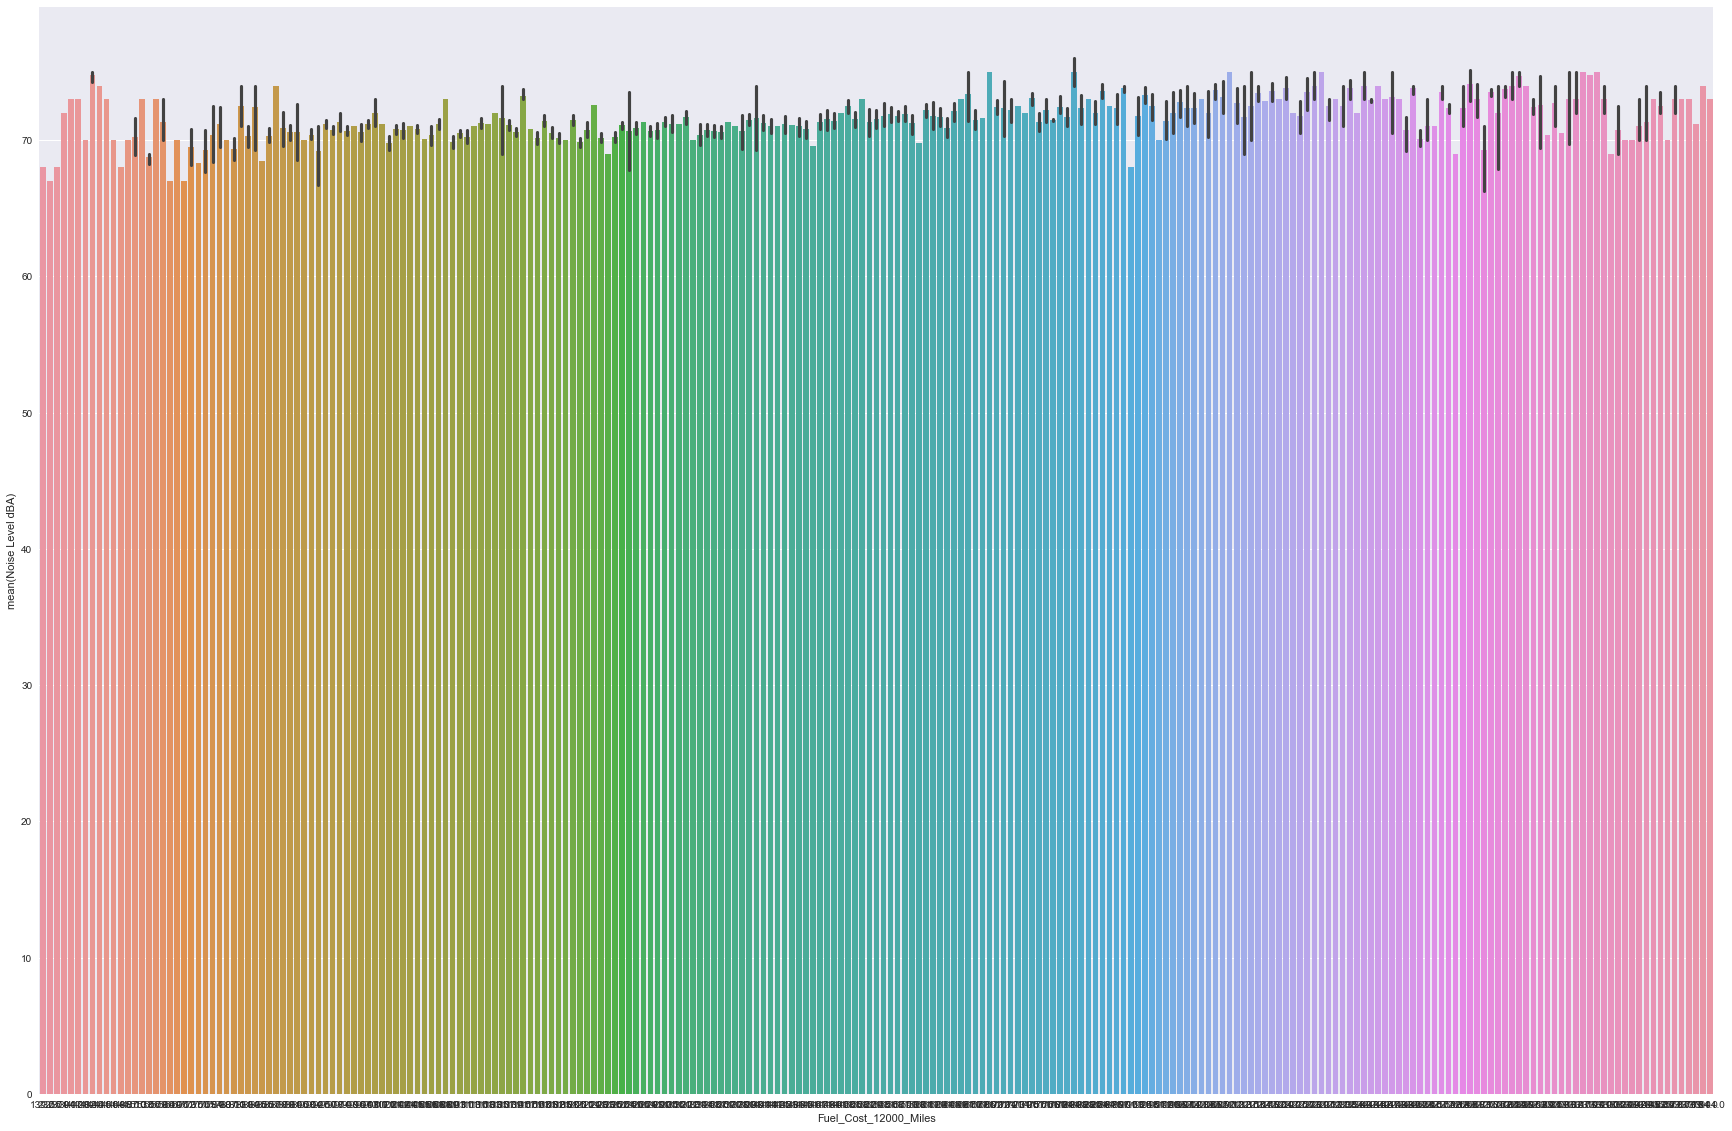

In [34]:

sns.barplot(x='Fuel_Cost_12000_Miles', y='Noise Level dBA', data=rawds)

In [35]:
rawds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 16 columns):
Manufacturer             5118 non-null object
Description              5118 non-null object
Transmission             5086 non-null object
Engine Capacity          5088 non-null float64
Fuel Type                5118 non-null object
Metric Urban Cold        5037 non-null float64
Metric Extra-Urban       5037 non-null float64
Metric Combined          5088 non-null float64
Imperial Urban Cold      5037 non-null float64
Imperial Extra-Urban     5037 non-null float64
Imperial Combined        5088 non-null float64
CO2 g/km                 5118 non-null int64
Fuel_Cost_12000_Miles    5088 non-null float64
Noise Level dBA          5118 non-null float64
Emissions CO mg/km       5088 non-null float64
Emissions Nox mg/km      5088 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 639.8+ KB


In [36]:
rawds['Fuel_Cost_12000_Miles'].fillna(0.0)

0        807.0
1        807.0
2        807.0
3        784.0
4        807.0
5        831.0
6        831.0
7        807.0
8        807.0
9        807.0
10       807.0
11       831.0
12       760.0
13       784.0
14       760.0
15       760.0
16       807.0
17       807.0
18       807.0
19       807.0
20       807.0
21       831.0
22       831.0
23       807.0
24       760.0
25       831.0
26       712.0
27       831.0
28       712.0
29       737.0
         ...  
5088    1159.0
5089    1137.0
5090    1159.0
5091    1137.0
5092    1206.0
5093    1206.0
5094    1206.0
5095    1159.0
5096    1206.0
5097    1206.0
5098    1159.0
5099    1137.0
5100    1159.0
5101    1274.0
5102    1274.0
5103    1274.0
5104    1206.0
5105    1182.0
5106    1137.0
5107    1436.0
5108    1436.0
5109    1436.0
5110    1414.0
5111    1436.0
5112    1484.0
5113    1505.0
5114    1505.0
5115    1577.0
5116    1692.0
5117    1692.0
Name: Fuel_Cost_12000_Miles, Length: 5118, dtype: float64

# The following shows the outliers in the emission of CO gas which needs to be limited or rather removed.

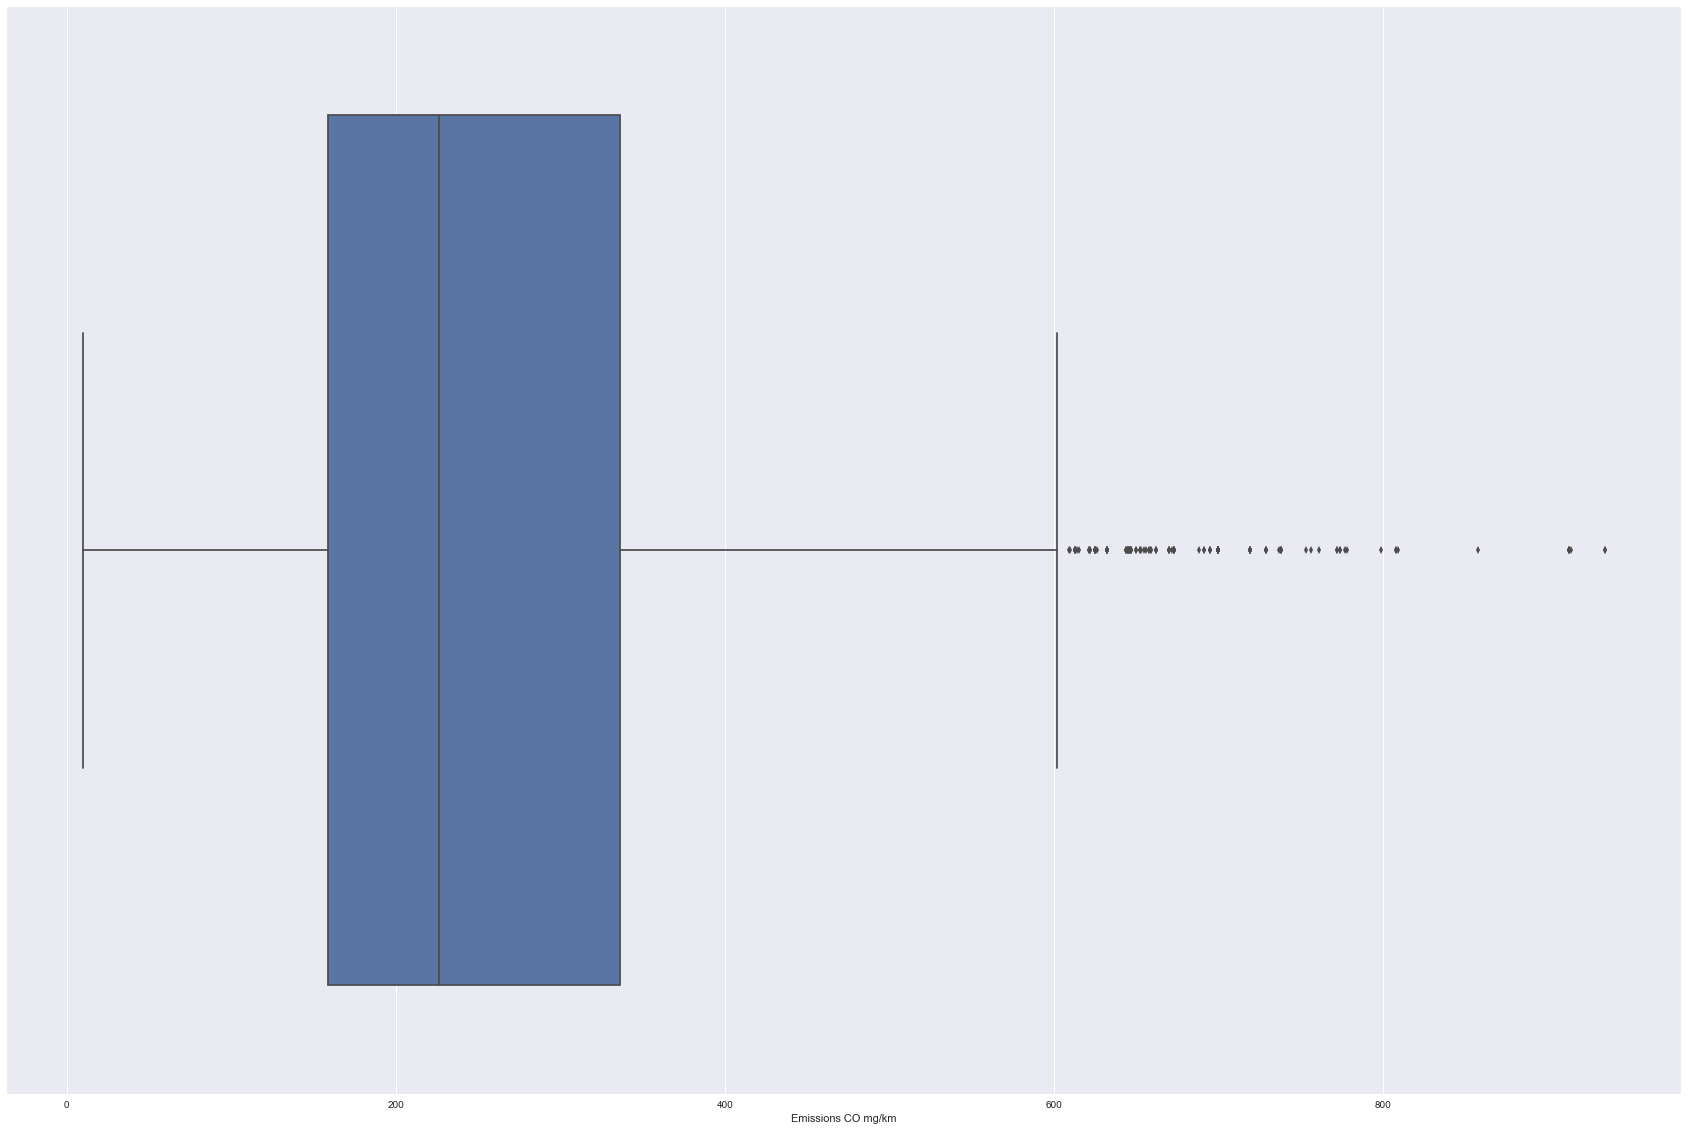

In [37]:
sns.boxplot(x=rawds['Emissions CO mg/km'])

# The following shows the outliers costwise

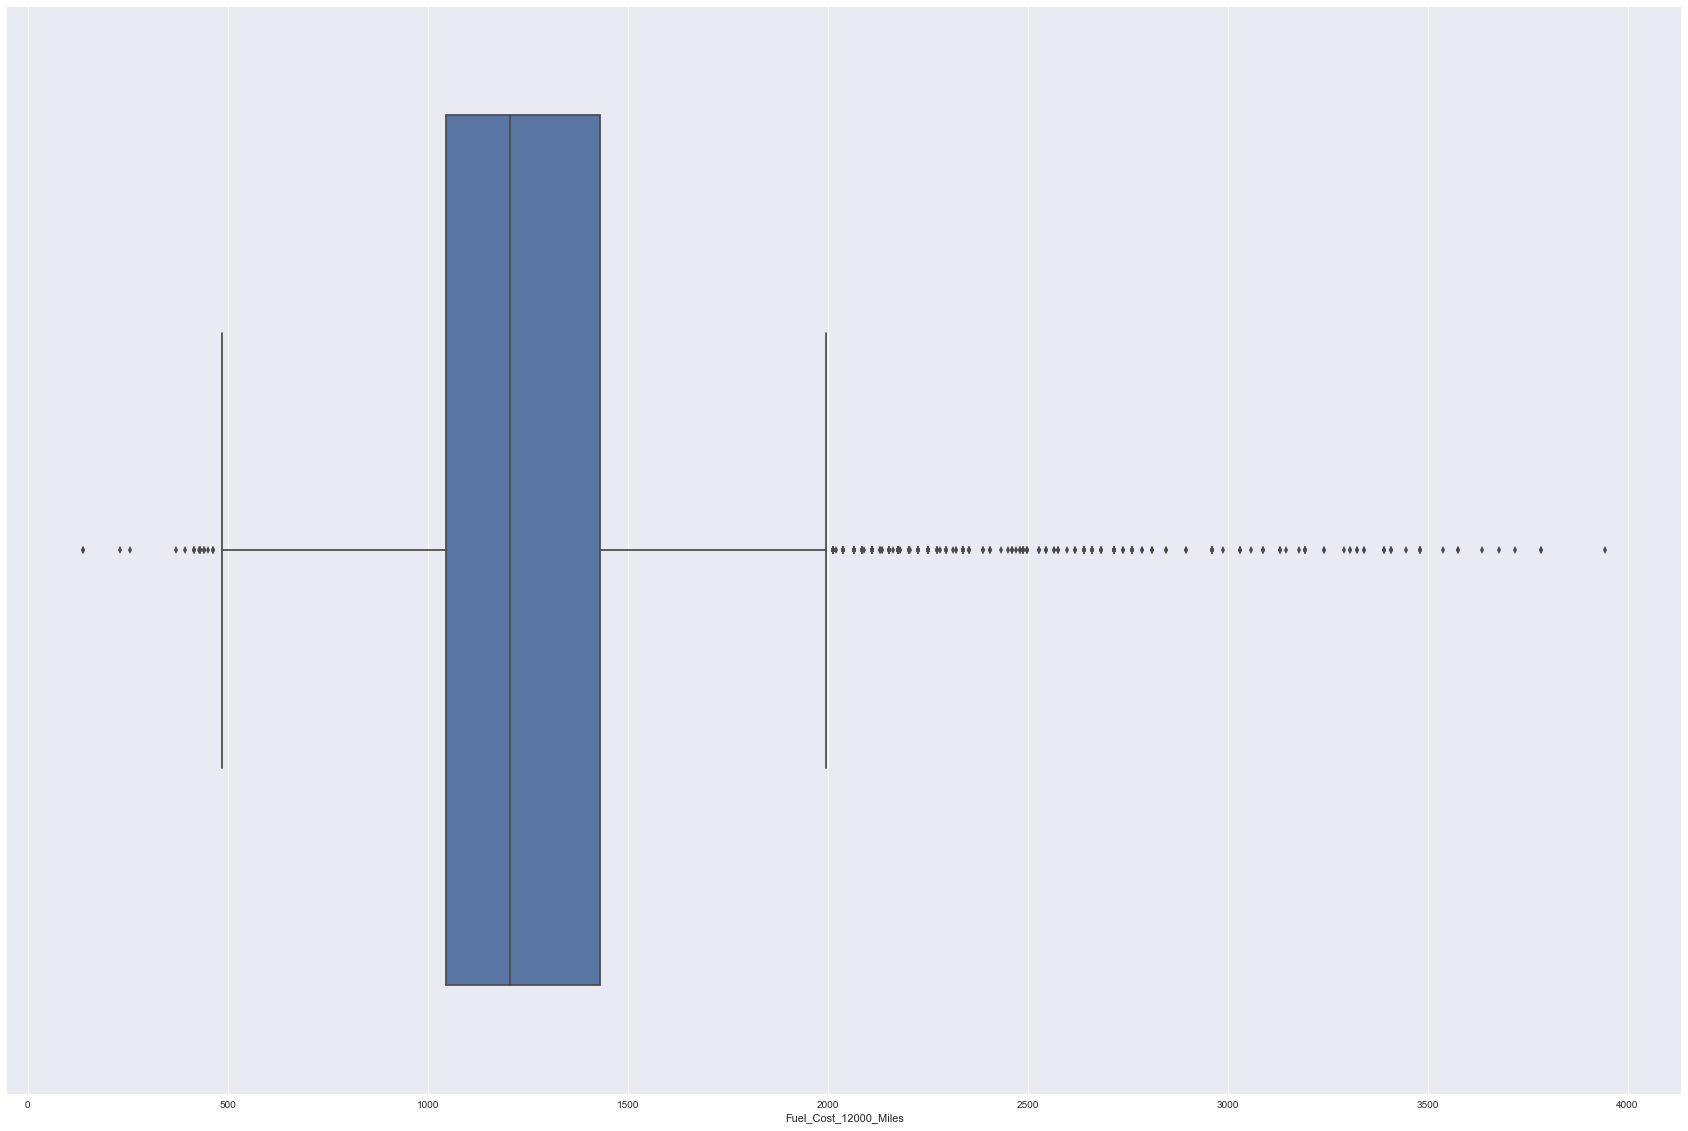

In [38]:
sns.boxplot(x=rawds['Fuel_Cost_12000_Miles'])

# Comparison of CO emitted and the fuel cost with the type of fuel.

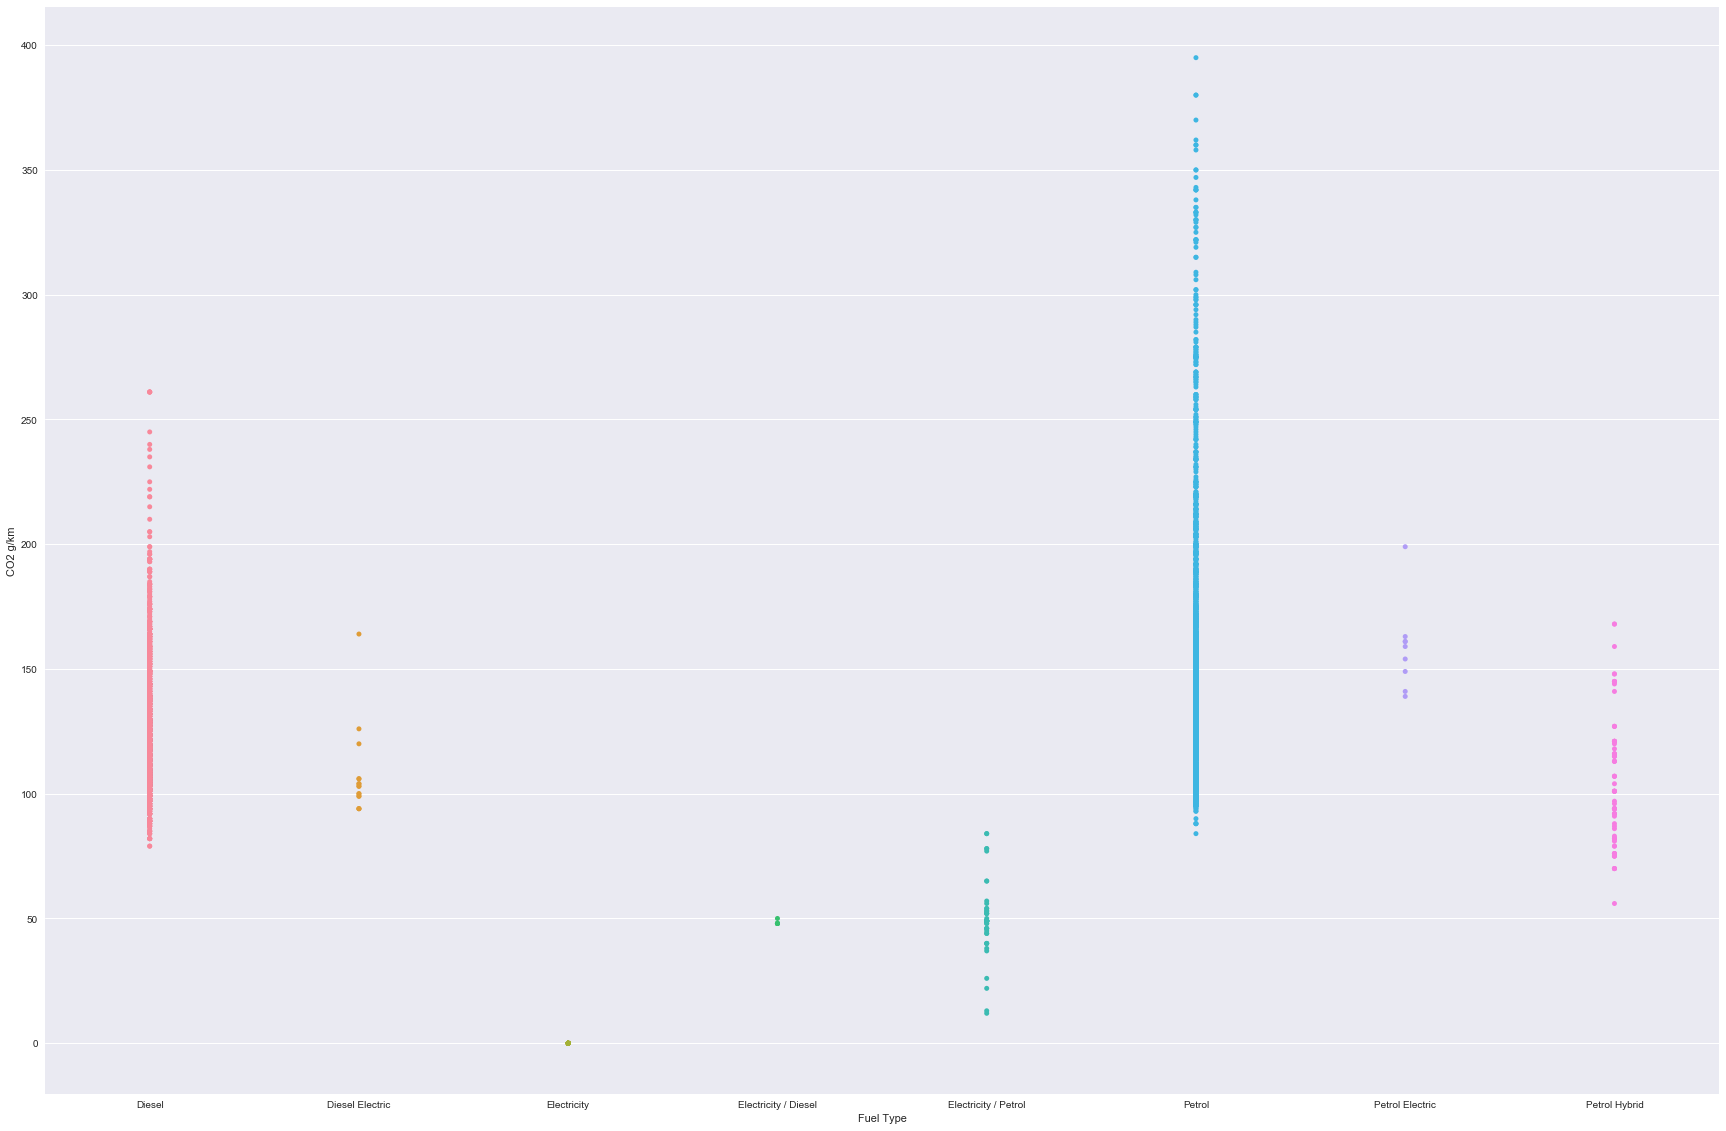

In [39]:
sns.stripplot(x="Fuel Type", y="CO2 g/km", data=rawds)

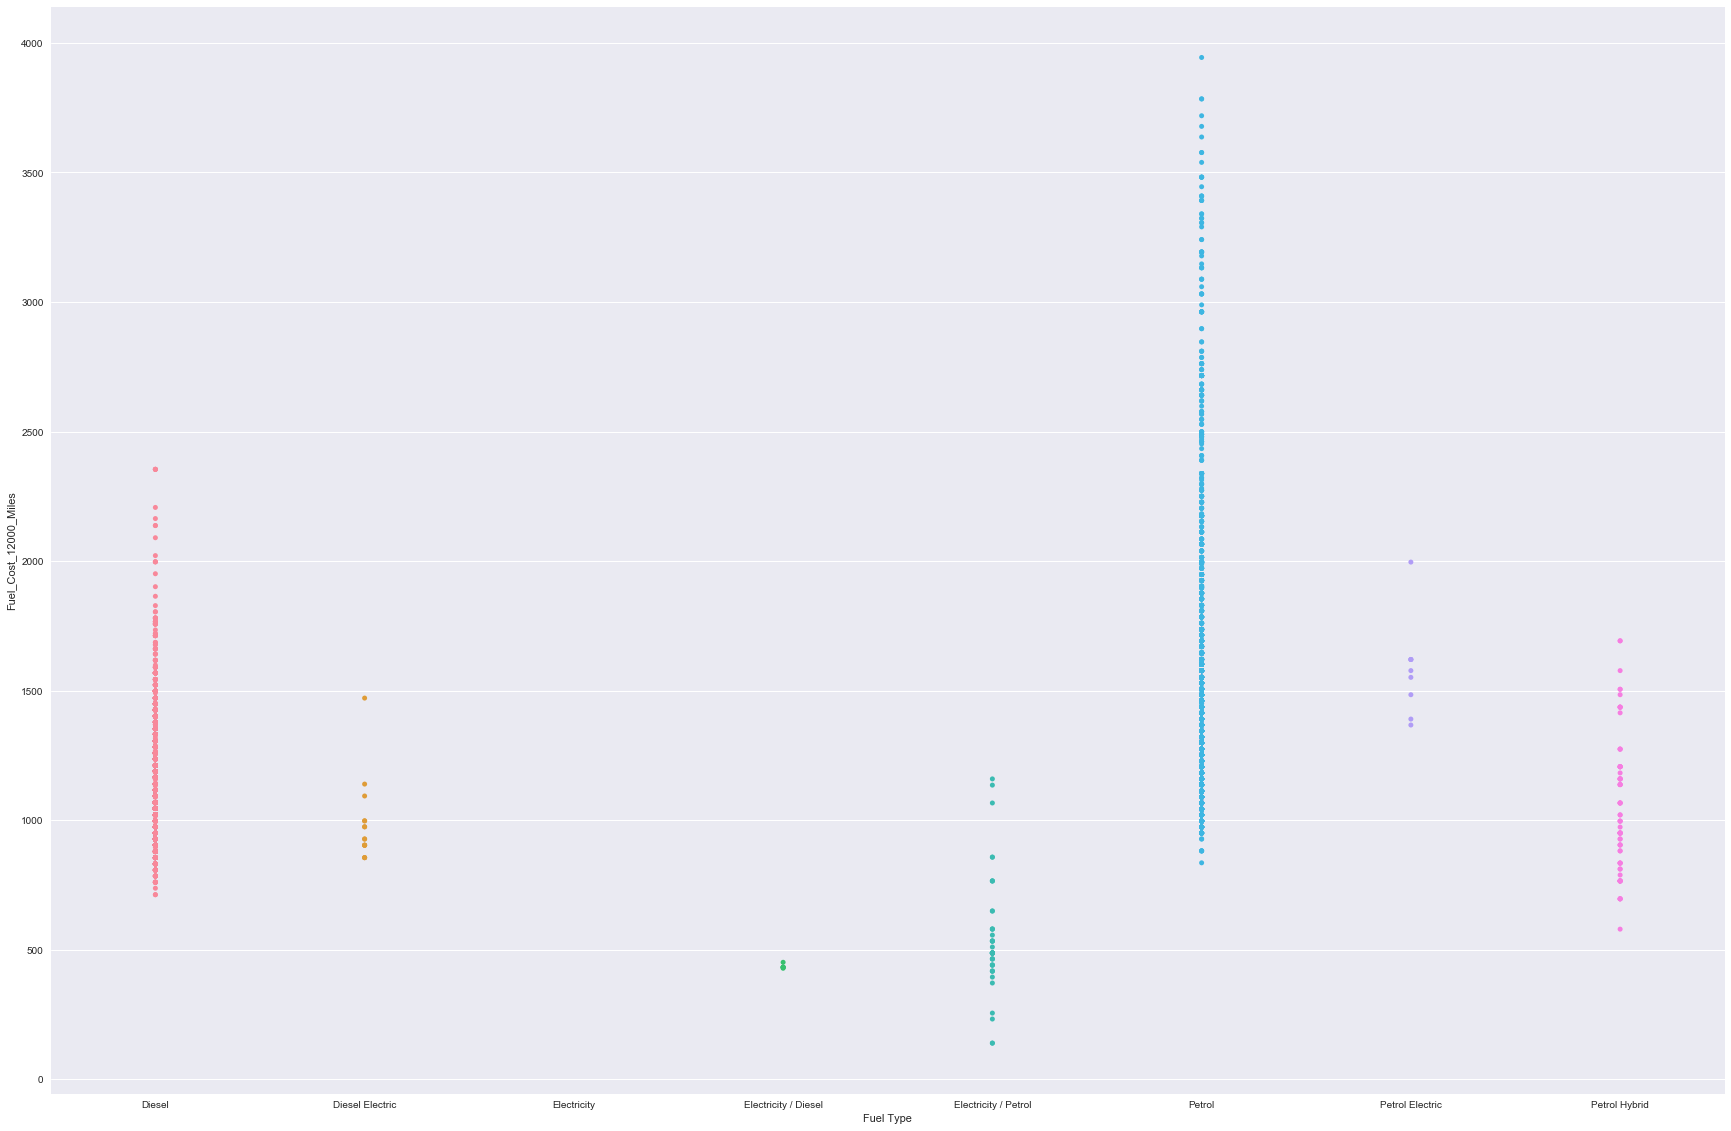

In [40]:
sns.stripplot(x="Fuel Type", y="Fuel_Cost_12000_Miles", data=rawds)

# The below plot clearly indicates how the different parameters correlate to each other and this is done using a heatmap.

                      Engine Capacity  Metric Combined  Imperial Extra-Urban  \
Engine Capacity              1.000000         0.734707             -0.611703   
Metric Combined              0.734707         1.000000             -0.889933   
Imperial Extra-Urban        -0.611703        -0.889933              1.000000   
Imperial Combined           -0.437390        -0.770158              0.957122   
CO2 g/km                     0.781482         0.980892             -0.878671   
Emissions CO mg/km           0.002617         0.325101             -0.271653   
Emissions Nox mg/km          0.043877        -0.208128              0.235406   

                      Imperial Combined  CO2 g/km  Emissions CO mg/km  \
Engine Capacity               -0.437390  0.781482            0.002617   
Metric Combined               -0.770158  0.980892            0.325101   
Imperial Extra-Urban           0.957122 -0.878671           -0.271653   
Imperial Combined              1.000000 -0.760921           -0.3086

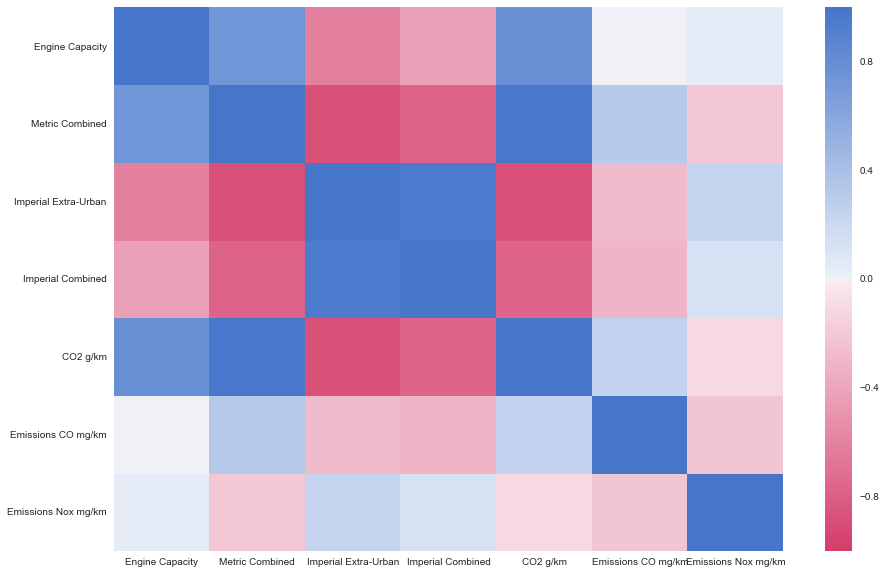

In [41]:
cmap = sns.diverging_palette(0, 255, sep=1, n=250, as_cmap=True)
plt.rcParams['figure.figsize']=(15,10)

correlations = rawds[['Engine Capacity','Metric Combined','Imperial Extra-Urban','Imperial Combined' , 'CO2 g/km','Emissions CO mg/km','Emissions Nox mg/km']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [42]:
rawds.describe()



,Engine Capacity,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
count,5088.000000,5037.000000,5037.000000,5088.000000,5037.000000,5037.000000,5088.000000,5118.000000,5088.000000,5118.000000,5088.000000,5088.000000
mean,1986.814465,6.905182,4.805579,5.544929,45.362220,61.687314,55.250688,134.633841,1298.791470,71.100547,261.012579,37.200865
std,806.608051,2.760090,1.214175,1.776506,12.862403,12.615114,17.442871,40.377900,406.837373,2.047774,141.120813,21.062978
min,647.000000,0.000000,0.000000,0.600000,0.000000,0.000000,16.600000,0.000000,139.000000,63.000000,10.000000,1.000000
25%,1499.000000,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,1045.000000,70.000000,159.000000,22.000000
50%,1968.000000,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,1206.000000,71.000000,226.500000,35.000000
75%,1998.000000,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,148.000000,1430.000000,73.000000,336.250000,51.000000
max,6752.000000,25.600000,12.100000,17.000000,97.400000,104.600000,470.800000,395.000000,3944.000000,76.000000,935.000000,726.000000


# ASSIGNMENT 2

# The basic visualization of all the data is done, so let's go ahead with building machine learning models on our data. 

In [43]:
rawds.columns

Index(['Manufacturer', 'Description', 'Transmission', 'Engine Capacity',
       'Fuel Type', 'Metric Urban Cold', 'Metric Extra-Urban',
       'Metric Combined', 'Imperial Urban Cold', 'Imperial Extra-Urban',
       'Imperial Combined', 'CO2 g/km', 'Fuel_Cost_12000_Miles',
       'Noise Level dBA', 'Emissions CO mg/km', 'Emissions Nox mg/km'],
      dtype='object')

In [44]:
rawds.dropna()


,Manufacturer,Description,Transmission,Engine Capacity,Fuel Type,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
0,ALFA ROMEO,1.3 JTDm-2 95 bhp,M5,1248.0,Diesel,4.3,2.9,3.4,65.7,97.4,83.1,89,807.0,67.5,234.0,67.0
1,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
2,BMW,116d ED Plus 16'' tyres,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,68.0,119.0,37.0
3,CITROEN,BlueHDi 100 S&S,M5,1560.0,Diesel,3.7,3.1,3.3,76.3,91.1,85.6,86,784.0,68.8,272.0,55.0
4,CITROEN,BlueHDi 100 S&S ETG6,AMT6,1560.0,Diesel,3.9,3.2,3.4,72.4,88.3,83.1,89,807.0,69.2,185.0,40.0
5,DACIA,dCi 90,M5,1461.0,Diesel,3.7,3.5,3.5,76.4,83.1,80.7,90,831.0,73.8,271.0,31.0
6,DACIA,dCi 90,M5,1461.0,Diesel,3.7,3.4,3.5,76.4,83.1,80.7,90,831.0,71.5,155.0,30.0
7,DS,BlueHDi 100 S&S,M5,1560.0,Diesel,3.8,3.2,3.4,74.3,88.3,83.1,87,807.0,69.4,196.0,34.0
8,FIAT,1.3 MultiJet 95 bhp,M5,1248.0,Diesel,4.1,3.0,3.4,68.9,94.2,83.1,89,807.0,71.5,177.0,40.0
9,FIAT,1.6 MultiJet 120 bhp Elite (Eco),M6,1598.0,Diesel,4.0,3.0,3.4,70.6,94.2,83.1,89,807.0,69.0,202.0,59.0


In [45]:
rawds.isnull()

,Manufacturer,Description,Transmission,Engine Capacity,Fuel Type,Metric Urban Cold,Metric Extra-Urban,Metric Combined,Imperial Urban Cold,Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel_Cost_12000_Miles,Noise Level dBA,Emissions CO mg/km,Emissions Nox mg/km
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
mask=False
for col in rawds.columns: mask = mask | rawds[col].isnull()
dfnulls = rawds[mask]

# Let's see how each of these parameters are correlated in the dataset.

                       Engine Capacity  Metric Urban Cold  Metric Extra-Urban  \
Engine Capacity               1.000000           0.730103            0.739264   
Metric Urban Cold             0.730103           1.000000            0.931228   
Metric Extra-Urban            0.739264           0.931228            1.000000   
Metric Combined               0.734707           0.984590            0.976556   
Imperial Urban Cold          -0.521969          -0.869986           -0.843996   
Imperial Extra-Urban         -0.611703          -0.829435           -0.920025   
Imperial Combined            -0.437390          -0.886069           -0.922884   
CO2 g/km                      0.781482           0.957868            0.972624   
Fuel_Cost_12000_Miles         0.744728           0.981652            0.978588   
Noise Level dBA               0.219768           0.285150            0.272991   
Emissions CO mg/km            0.002617           0.333229            0.270229   
Emissions Nox mg/km         

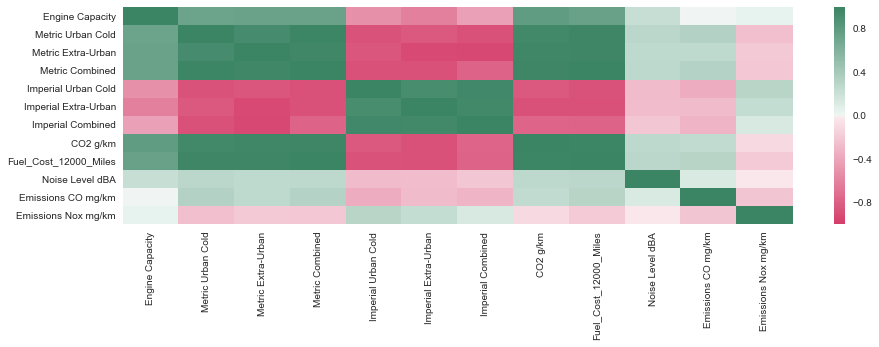

In [47]:
plt.rcParams['figure.figsize']=(15,4)
cmap = sns.diverging_palette(0,150,sep=1,n=150,as_cmap=True)
correlations = rawds.corr()#NA_Sales	EU_Sales	JP_Sales
#correlations =stat_null.corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

# Let's take some important parameters and see how they're correlated using a plot to visualize the data.

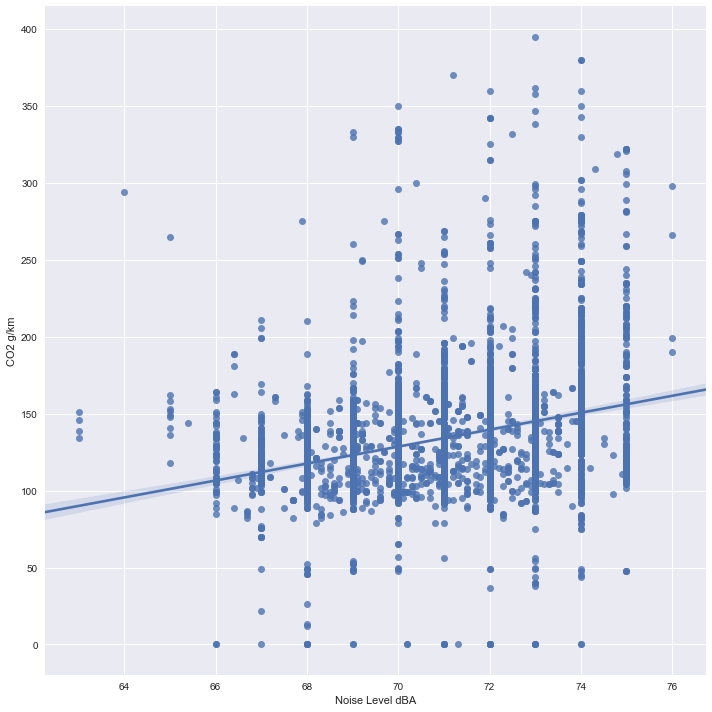

In [48]:
plt.rcParams['figure.figsize']=(15,3)
sns.lmplot('Noise Level dBA','CO2 g/km',data=rawds,size = 10)
plt.show()

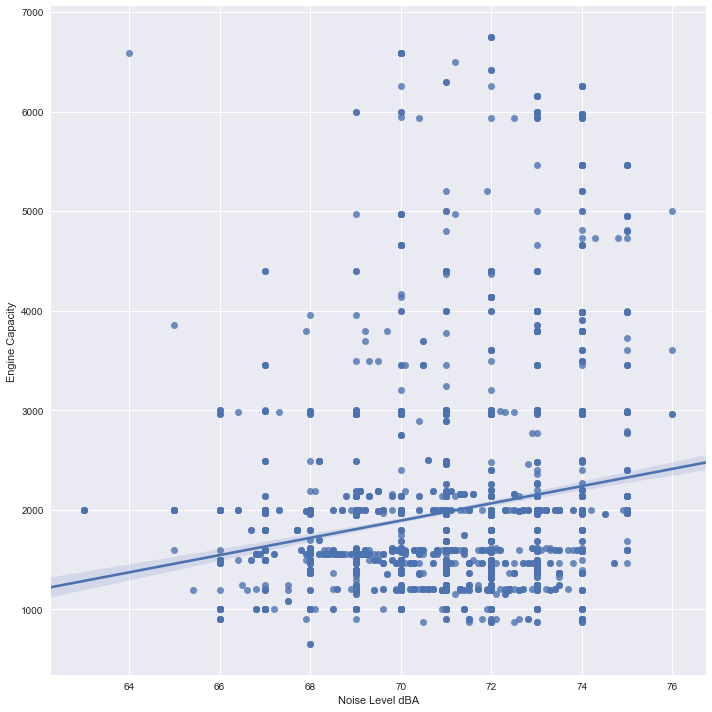

In [49]:
plt.rcParams['figure.figsize']=(15,3)
sns.lmplot('Noise Level dBA','Engine Capacity',data=rawds,size = 10)
plt.show()

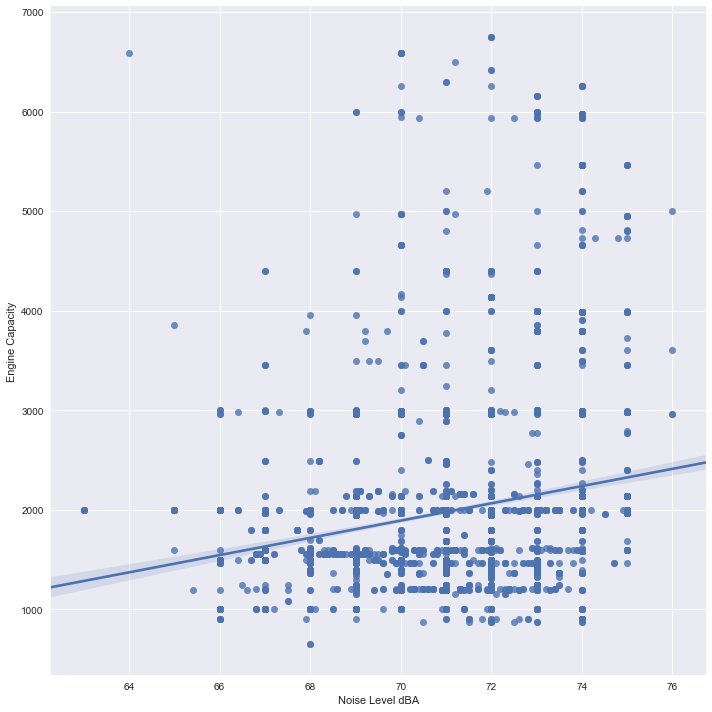

In [50]:
plt.rcParams['figure.figsize']=(15,3)
sns.lmplot('Noise Level dBA','Engine Capacity',data=rawds,size = 10)
plt.show()


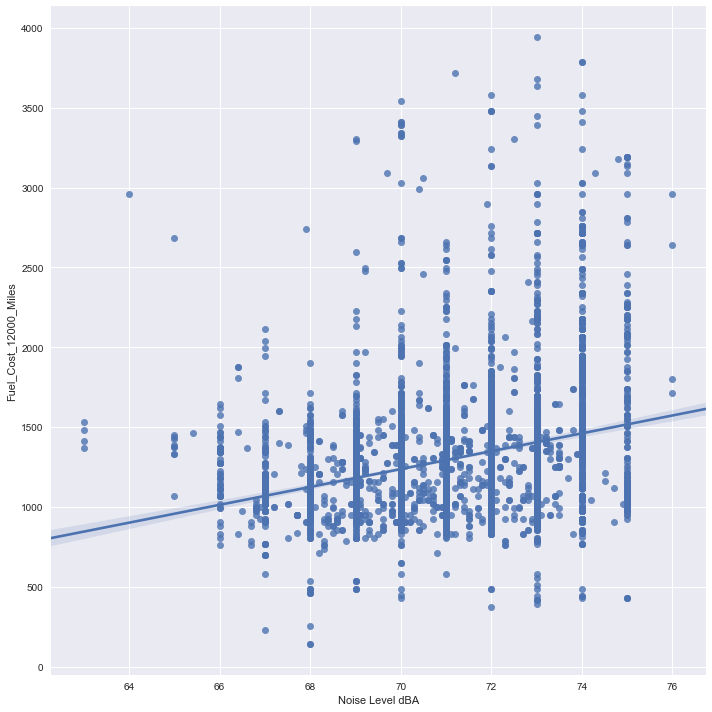

In [51]:
plt.rcParams['figure.figsize']=(15,3)
sns.lmplot('Noise Level dBA','Fuel_Cost_12000_Miles',data=rawds,size = 10)
plt.show()

In [52]:
list(rawds)

['Manufacturer',
 'Description',
 'Transmission',
 'Engine Capacity',
 'Fuel Type',
 'Metric Urban Cold',
 'Metric Extra-Urban',
 'Metric Combined',
 'Imperial Urban Cold',
 'Imperial Extra-Urban',
 'Imperial Combined',
 'CO2 g/km',
 'Fuel_Cost_12000_Miles',
 'Noise Level dBA',
 'Emissions CO mg/km',
 'Emissions Nox mg/km']

In [53]:
rawds.isnull().any()

Manufacturer             False
Description              False
Transmission              True
Engine Capacity           True
Fuel Type                False
Metric Urban Cold         True
Metric Extra-Urban        True
Metric Combined           True
Imperial Urban Cold       True
Imperial Extra-Urban      True
Imperial Combined         True
CO2 g/km                 False
Fuel_Cost_12000_Miles     True
Noise Level dBA          False
Emissions CO mg/km        True
Emissions Nox mg/km       True
dtype: bool

# Let's coerce our data so that the improper values is all forced into NaN  which can be filled with a different value

In [54]:
rawds = rawds.fillna(method='ffill')

In [55]:
rawds['CO2 g/km'] = pd.to_numeric(rawds['CO2 g/km'])

rawds['CO2 g/km'] = pd.to_numeric(rawds['CO2 g/km'], errors='coerce')

In [56]:
rawds['Imperial Combined'] = pd.to_numeric(rawds['Imperial Combined'])

rawds['Imperial Combined'] = pd.to_numeric(rawds['Imperial Combined'], errors='coerce')

In [57]:
rawds['Metric Combined'] = pd.to_numeric(rawds['Metric Combined'])

rawds['Metric Combined'] = pd.to_numeric(rawds['Metric Combined'], errors='coerce')

In [58]:
rawds['Fuel_Cost_12000_Miles'] = pd.to_numeric(rawds['Fuel_Cost_12000_Miles'])

rawds['Fuel_Cost_12000_Miles'] = pd.to_numeric(rawds['Fuel_Cost_12000_Miles'], errors='coerce')

In [59]:
rawds['Noise Level dBA'] = pd.to_numeric(rawds['Noise Level dBA'])

rawds['Noise Level dBA'] = pd.to_numeric(rawds['Noise Level dBA'], errors='coerce')

# Let's start by splitting our data into a training set and test set!

In [60]:


x =rawds[['CO2 g/km','Imperial Combined','Metric Combined','Noise Level dBA']]

y = rawds[['Fuel_Cost_12000_Miles']]



#  Building a Multivariate Linear Regression Model on the test-frames selected.

In [61]:
from sklearn.cross_validation import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [62]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# print the intercept
print(lm.intercept_)

[ 31.0909734]


# Let's make the predictions for 'Fuel Cost' based on the other metrics considered.

In [81]:
y_pred = lm.predict(X_test)

In [82]:
y_pred

array([[ 1286.57610661],
       [ 1246.52072938],
       [ 1331.55996563],
       ..., 
       [  923.20491671],
       [ 1860.21399959],
       [ 1384.56977309]])

In [83]:
model.score(X_test,y_test)

0.99895415060376302

# Fitting the Multivariate Model

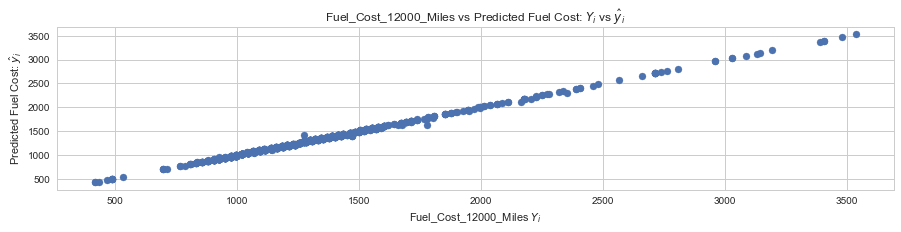

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel("Fuel_Cost_12000_Miles $Y_i$")
plt.ylabel("Predicted Fuel Cost: $\hat{y}_i$")
plt.title("Fuel_Cost_12000_Miles vs Predicted Fuel Cost: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [85]:
from sklearn import metrics

# Let's calculate the RMS Error value.

In [86]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

13.315061415843049

In [93]:
y_m=np.mean(y_test)
y_m

Fuel_Cost_12000_Miles    1290.53418
dtype: float64

In [94]:
rmse/y_m

Fuel_Cost_12000_Miles    0.010317
dtype: float64

In [95]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [98]:
print “Score:”, radws.score(X_test, y_test)


SyntaxError: invalid character in identifier (<ipython-input-98-940d70d8683c>, line 1)

In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

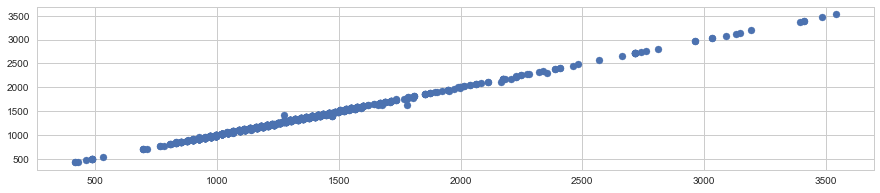

In [92]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

In [101]:
print("Accuracy: %0.2f (+/- %0.2f)" % (rawds.mean(), rawds.std() * 2))

TypeError: cannot convert the series to <class 'float'>

# Part B-Logistic Regression

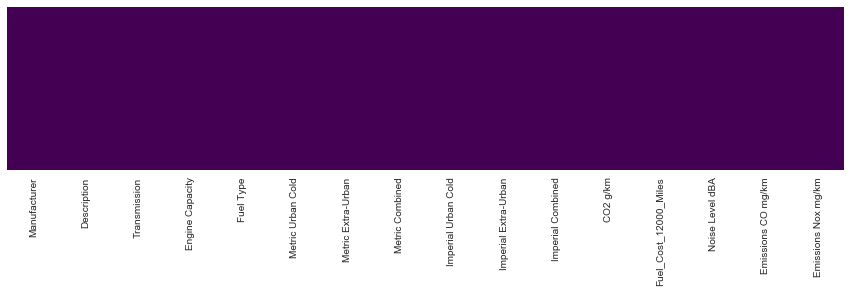

In [70]:
sns.heatmap(rawds.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# So we'll go ahead with making visualizations on a few important parameters


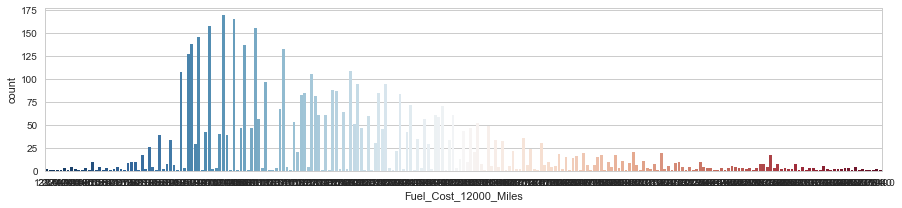

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Fuel_Cost_12000_Miles',data=rawds,palette='RdBu_r')

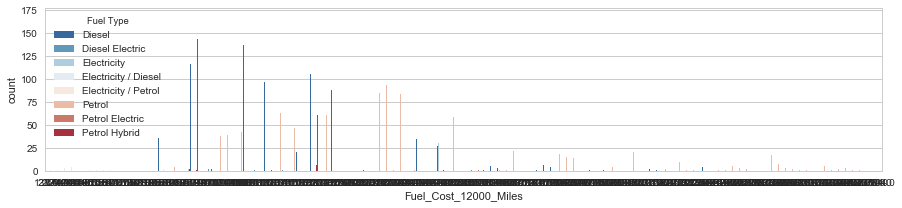

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Fuel_Cost_12000_Miles',hue='Fuel Type',data=rawds,palette='RdBu_r')

In [73]:
rawds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 16 columns):
Manufacturer             5118 non-null object
Description              5118 non-null object
Transmission             5118 non-null object
Engine Capacity          5118 non-null float64
Fuel Type                5118 non-null object
Metric Urban Cold        5118 non-null float64
Metric Extra-Urban       5118 non-null float64
Metric Combined          5118 non-null float64
Imperial Urban Cold      5118 non-null float64
Imperial Extra-Urban     5118 non-null float64
Imperial Combined        5118 non-null float64
CO2 g/km                 5118 non-null int64
Fuel_Cost_12000_Miles    5118 non-null float64
Noise Level dBA          5118 non-null float64
Emissions CO mg/km       5118 non-null float64
Emissions Nox mg/km      5118 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 639.8+ KB


# The data looks neat. Let's perform the logistic regression!

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\punit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluation

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      417.0       0.00      0.00      0.00         2
      432.0       0.00      0.00      0.00         1
      464.0       0.00      0.00      0.00         1
      487.0       0.00      0.00      0.00         6
      533.0       0.00      0.00      0.00         1
      696.0       0.00      0.00      0.00         3
      712.0       0.00      0.00      0.00         1
      765.0       0.00      0.00      0.00         2
      784.0       0.00      0.00      0.00         1
      807.0       0.00      0.00      0.00         3
      811.0       0.00      0.00      0.00         1
      831.0       0.00      0.00      0.00         5
      834.0       0.00      0.00      0.00         2
      855.0       0.00      0.00      0.00         9
      878.0       0.00      0.00      0.00         2
      879.0       0.00      0.00      0.00         8
      881.0       0.00      0.00      0.00         1
      903.0       0.00      0.00      0.00   

C:\Users\punit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
